# Case_study_3: Correlation and Regression 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import statsmodels.api as sm

In [3]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


**1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.**

In [5]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [7]:
data.sum()

Date                    2018-10-082018-10-052018-10-042018-10-032018-1...
Add1(in Thousands)                                                54853.4
Add2(in Thousands)                                                55703.1
Add3(in Thousands)                                                53913.1
Add4(in Thousands)                                                54780.9
Add5(in Thousands)                                                54766.3
Profit(in Thousands)                                          1.03722e+06
dtype: object

Among the 5 companies, **Highest amount** spent on **Ad2**, and **least** on **Ad3**


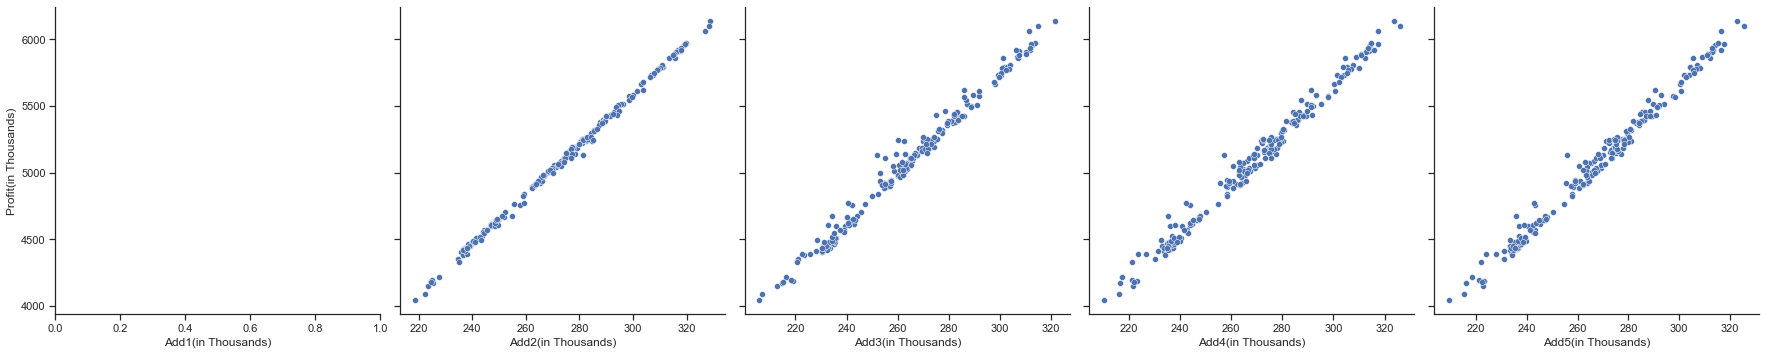

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, x_vars=['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'], y_vars='Profit(in Thousands)', height=5, aspect=1, kind='scatter')
plt.show()

Amount spend on advertisements and profit id directly proportional
________________________________________________________________________________

**2. Build a regression model to predict the profit from the given data and comment your findings on it.**

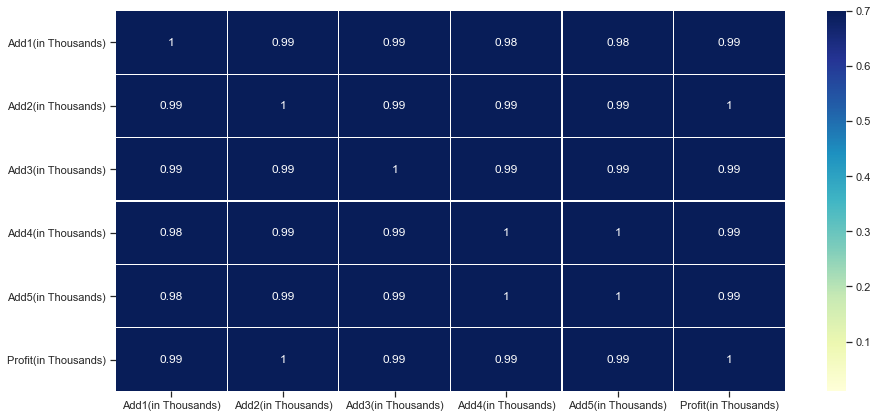

In [9]:
corrmatrix = data.corr()
plt.subplots(figsize = (15,7));
sns.heatmap(corrmatrix, vmin = 0.01, vmax=0.7, annot = True, linewidth = 0.2,cmap="YlGnBu");

In [10]:
X = data['Add2(in Thousands)']
y = data['Profit(in Thousands)']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [12]:
y_train.head()

3      4391.665
157    5263.935
81     5027.633
32     4566.310
99     4772.520
Name: Profit(in Thousands), dtype: float64

In [13]:
X_train.head()

3      237.50
157    282.75
81     269.35
32     244.50
99     259.50
Name: Add2(in Thousands), dtype: float64

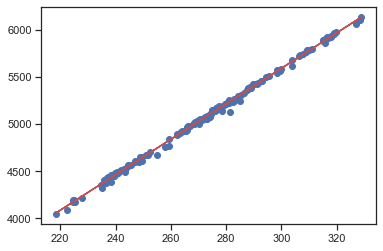

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, (-45.670847)+ 18.787220 *X_train, 'r')
plt.show()

Regression line is fit with the data

In [15]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     Profit(in Thousands)   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 9.694e+04
Date:                  Thu, 09 Dec 2021   Prob (F-statistic):          6.36e-227
Time:                          20:27:03   Log-Likelihood:                -726.74
No. Observations:                   164   AIC:                             1457.
Df Residuals:                       162   BIC:                             1464.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

3) Predict the profit generated by the company, if they wish to spend the following amount for advertisement.